# Base import

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%s' % float(height))

## find image error

In [1]:
import data_utils

In [2]:
data_utils.find_error_pil('./image_women/')
print('-----------')
data_utils.find_error_cv('./image_women/')
print('-----------')
data_utils.find_error_skimage('./image_women/')
print('-----------')
data_utils.find_type_error('./image_women/')

7173 29000-29802-2.jpg ()
cannot identify image file './image_women/38000-38163-3.jpg'
cant_open = 0
shape_len_not_3 = 1
shape_error = 0
-----------
9341 38000-38163-3.jpg
cant_open = 1
shape_len_not_3 = 0
shape_error = 0
-----------
Could not load "" 
Reason: "image file is truncated (4 bytes not processed)"
Please see documentation at: http://pillow.readthedocs.org/en/latest/installation.html#external-libraries
cannot identify image file <_io.BufferedReader name='./image_women/38000-38163-3.jpg'>
cant_open = 0
shape_len_not_3 = 0
shape_error = 0
-----------
cannot identify image file './image_women/38000-38163-3.jpg'
num_type_error: 0
gif: 0
num_jpg: 0
num_jpeg: 15695
num_png: 0


([],
 [],
 [],
 [(0, '34000-34201-1.jpg', 'JPEG'),
  (1, '25000-25173-3.jpg', 'JPEG'),
  (2, '14000-14471-1.jpg', 'JPEG'),
  (3, '23000-23520-2.jpg', 'JPEG'),
  (4, '20000-20540-1.jpg', 'JPEG'),
  (5, '11000-11567-8.jpg', 'JPEG'),
  (6, '24000-24048-4.jpg', 'JPEG'),
  (7, '10000-10443-5.jpg', 'JPEG'),
  (8, '9000-9061-1.jpg', 'JPEG'),
  (9, '38000-38008-1.jpg', 'JPEG'),
  (10, '30000-30230-5.jpg', 'JPEG'),
  (11, '18000-18021-1.jpg', 'JPEG'),
  (12, '40000-40073-1.jpg', 'JPEG'),
  (13, '40000-40143-2.jpg', 'JPEG'),
  (14, '14000-14809-2.jpg', 'JPEG'),
  (15, '36000-36685-4.jpg', 'JPEG'),
  (16, '24000-24231-1.jpg', 'JPEG'),
  (17, '30000-30873-1.jpg', 'JPEG'),
  (18, '24000-24011-4.jpg', 'JPEG'),
  (19, '23000-23802-2.jpg', 'JPEG'),
  (20, '9000-9363-9.jpg', 'JPEG'),
  (21, '19000-19311-2.jpg', 'JPEG'),
  (22, '12000-12663-3.jpg', 'JPEG'),
  (23, '8000-8113-1.jpg', 'JPEG'),
  (24, '17000-17044-3.jpg', 'JPEG'),
  (25, '16000-16631-1.jpg', 'JPEG'),
  (26, '36000-36275-1.jpg', 'JPEG'),
  

## Class number

0 偏瘦	<= 18.4  
1 正常	18.5 ~ 23.9   
2 过重	24.0 ~ 27.9  
3 肥胖	>= 28.0

In [33]:
f = open('./dataset/women_train_label.json','r')
info_1 = json.load(f)
f = open('./dataset/women_val_label.json','r')
info_2 = json.load(f)

In [34]:
class_ids_dict = {0:u"Thin",1:u"Nomal",2:u"Fat",3:u"Fater"}

In [35]:
len(info_1)

14137

In [36]:
len(info_2)

1570

In [37]:
class_ids_1 = {}
for key in info_1.keys():
    class_id = info_1[key]['label']
    class_id = class_ids_dict[class_id]
    if class_id not in class_ids_1:
        class_ids_1[class_id] = 0
    class_ids_1[class_id] += 1

class_ids_2 = {}
for key in info_2.keys():
    class_id = info_2[key]['label']
    class_id = class_ids_dict[class_id]
    if class_id not in class_ids_2:
        class_ids_2[class_id] = 0
    class_ids_2[class_id] += 1

In [38]:
keys_1 = list(class_ids_1.keys())
keys_2 = list(class_ids_2.keys())
values_1 = list(class_ids_1.values())
values_2 = list(class_ids_2.values())

/home/xy/.pyenv/versions/anaconda3-5.1.0/envs/tf14/lib/python3.5/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


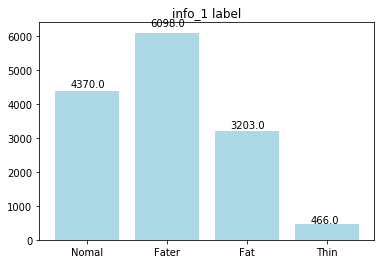

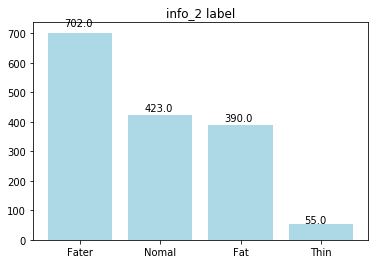

In [39]:
plt.figure(1)
plt.title('info_1 label')
a = plt.bar(left=keys_1,height=values_1,color="lightblue")
autolabel(a)
plt.figure(2)
plt.title('info_2 label')
a = plt.bar(left=keys_2,height=values_2,color="lightblue")
autolabel(a)

## Image Mean

In [3]:
im_dir = './dataset/image_women/'
names = os.listdir(im_dir)

In [42]:
mean_1 = []
mean_2 = []
mean_3 = []
for name in names:
    path = os.path.join(im_dir,name)
    im = cv2.imread(path)
    mean_1.append(np.mean(im[:,:,0]))
    mean_2.append(np.mean(im[:,:,1]))
    mean_3.append(np.mean(im[:,:,2]))

In [49]:
np.shape([mean_1,mean_2,mean_3])

(3, 15695)

In [53]:
mean = np.mean([mean_1,mean_2,mean_3],axis=1)

In [57]:
print(mean)

[ 93.23008961 104.59773337 116.64038406]
